<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine Learning(기계 학습)
    * 지도학습(Superivised Learning): 레이블이 있는 데이터를 학습
        * 분류(Classification): 클래스 분류
        * 회귀(Regression): 숫자 예측
    * 비지도학습(Unsupervised Learning): 레이블이 없는 데이터를 학습
    * 강화학습(Reinforcement Learning): 보상/벌칙을 통해서 학습

# Objectives

Fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측

* 농어의 길이(Length)로만 무게 예측 - KNN, Linear Regression
* 농어의 여러가지 특성들(Length, Diagonal, Height, Width)로 무게 예측 - Linear Regression

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # ML 모델
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비

In [ ]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
# fish DataFrame에서 'Perch'(농어) 어종만 선택
perch = fish[fish.Species == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


농어의 길이(Length)를 알면 무게(Weight) 예측할 수 있을까?

* 독립변수(feature) - Length
* 종속변수(label, target) - Weight

In [ ]:
# 종속변수
perch_weight = perch['Weight'].values
perch_weight  # label은 1d array

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
# 독립변수
perch_length = perch[['Length']].values
perch_length  # feature는 2d array

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

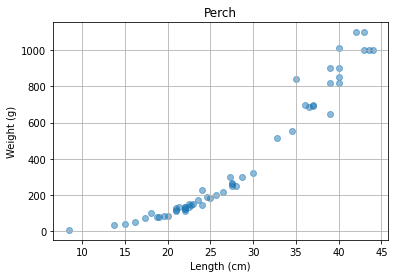

In [ ]:
# Weight ~ Length scatter plot
plt.scatter(perch_length, perch_weight, alpha=0.5)
plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.show()

In [ ]:
# X: 특성 행렬(2d array), y: 타겟 벡터(1d array)
X = perch_length.copy()
y = perch_weight.copy()

In [ ]:
X.shape, y.shape

((56, 1), (56,))

# Train/test split